In [ ]:
# Train three deep learning models and summarize
models = [
    ('xlm-roberta-base', 'cls_kn_xlmr_v2'),
    ('bert-base-multilingual-cased', 'cls_kn_mbert'),
    ('distilbert-base-multilingual-cased', 'cls_kn_distilmbert'),
]

results = {}
for ckpt, out in models:
    print(f"\n=== Training {ckpt} ===")
    metrics = train_kn_classifier(ckpt, out_dir=out, epochs=1)
    results[ckpt] = metrics
    print(ckpt, metrics)

print("\nSummary (macro_f1):")
for ckpt, m in results.items():
    print(ckpt, '->', round(m.get('eval_macro_f1', float('nan')), 4))


=== Training xlm-roberta-base ===


Map:   0%|          | 0/43270 [00:00<?, ? examples/s]

Map:   0%|          | 0/4808 [00:00<?, ? examples/s]

Map:   0%|          | 0/12020 [00:00<?, ? examples/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.778500
200,1.059300
300,0.896200
400,0.820200
500,0.779000
600,0.725300
700,0.695600
800,0.670200
900,0.675800
1000,0.637300


xlm-roberta-base {'eval_loss': 0.5606788396835327, 'eval_accuracy': 0.83369384359401, 'eval_macro_f1': 0.8274993708368041, 'eval_macro_precision': 0.8316463223633912, 'eval_macro_recall': 0.82701749328911, 'eval_runtime': 6.7477, 'eval_samples_per_second': 1781.338, 'eval_steps_per_second': 27.861, 'epoch': 1.0}

=== Training bert-base-multilingual-cased ===


Map:   0%|          | 0/43270 [00:00<?, ? examples/s]

Map:   0%|          | 0/4808 [00:00<?, ? examples/s]

Map:   0%|          | 0/12020 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,1.913300
200,1.201100
300,1.023600
400,0.929500
500,0.880800
600,0.820700
700,0.786800
800,0.774100
900,0.744200
1000,0.712300


bert-base-multilingual-cased {'eval_loss': 0.6361194252967834, 'eval_accuracy': 0.803910149750416, 'eval_macro_f1': 0.7948568889202062, 'eval_macro_precision': 0.7979410954088829, 'eval_macro_recall': 0.792995207441367, 'eval_runtime': 6.6106, 'eval_samples_per_second': 1818.289, 'eval_steps_per_second': 28.439, 'epoch': 1.0}

=== Training distilbert-base-multilingual-cased ===


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Map:   0%|          | 0/43270 [00:00<?, ? examples/s]

Map:   0%|          | 0/4808 [00:00<?, ? examples/s]

Map:   0%|          | 0/12020 [00:00<?, ? examples/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
100,2.064700
200,1.609200
300,1.358700
400,1.190900
500,1.100400
600,1.036200
700,0.972600
800,0.940000
900,0.935800
1000,0.852500


distilbert-base-multilingual-cased {'eval_loss': 0.7804274559020996, 'eval_accuracy': 0.7576539101497504, 'eval_macro_f1': 0.7458357741946047, 'eval_macro_precision': 0.747202638626711, 'eval_macro_recall': 0.7458033428604189, 'eval_runtime': 3.8116, 'eval_samples_per_second': 3153.493, 'eval_steps_per_second': 49.323, 'epoch': 1.0}

Summary (macro_f1):
xlm-roberta-base -> 0.8275
bert-base-multilingual-cased -> 0.7949
distilbert-base-multilingual-cased -> 0.7458


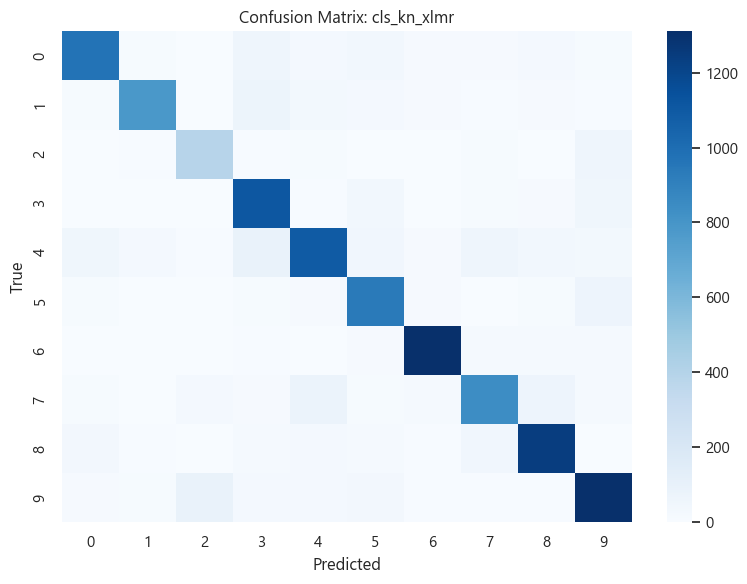

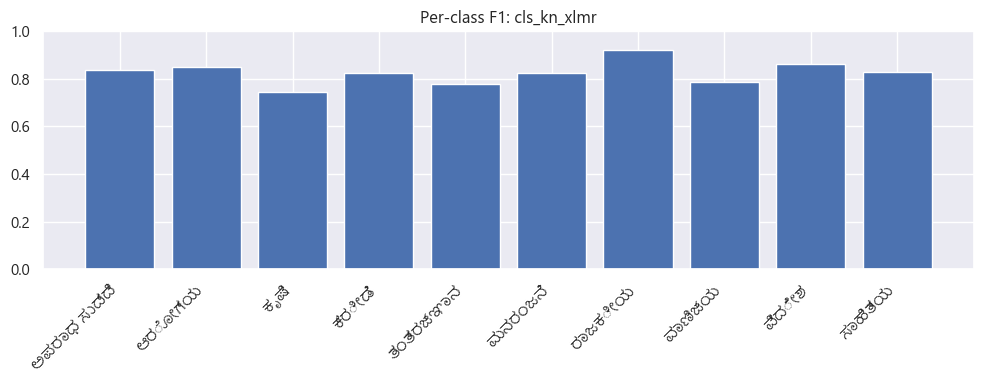

Saved: cls_kn_xlmr_cm.png, cls_kn_xlmr_per_class_f1.png, cls_kn_xlmr_report.txt


Map:   0%|          | 0/12020 [00:00<?, ? examples/s]

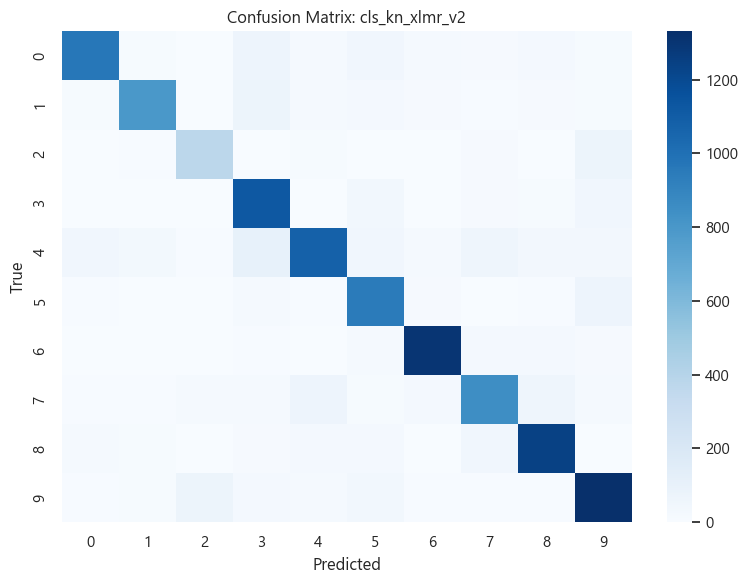

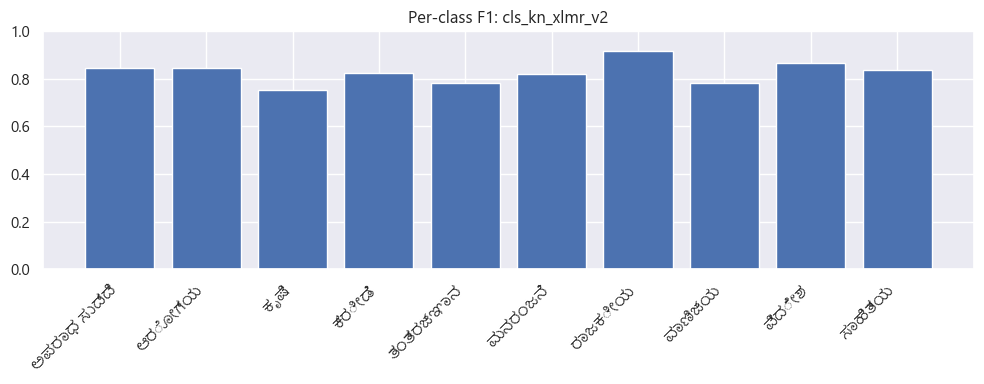

Saved: cls_kn_xlmr_v2_cm.png, cls_kn_xlmr_v2_per_class_f1.png, cls_kn_xlmr_v2_report.txt


Map:   0%|          | 0/12020 [00:00<?, ? examples/s]

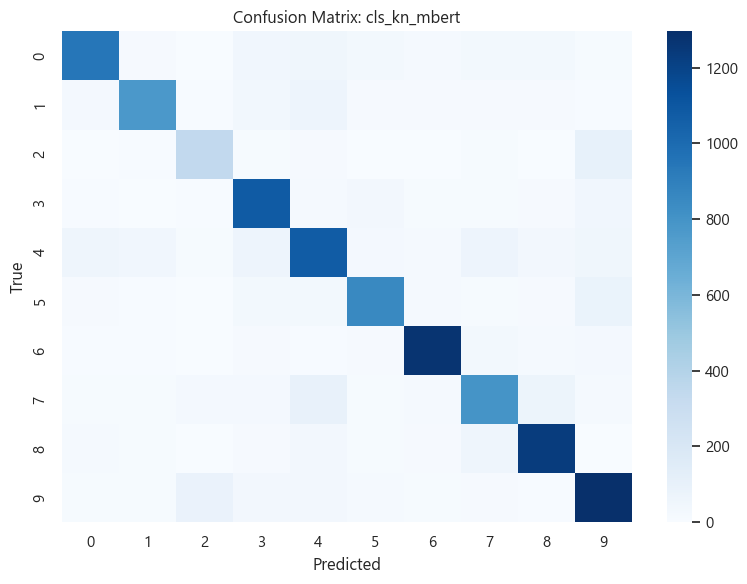

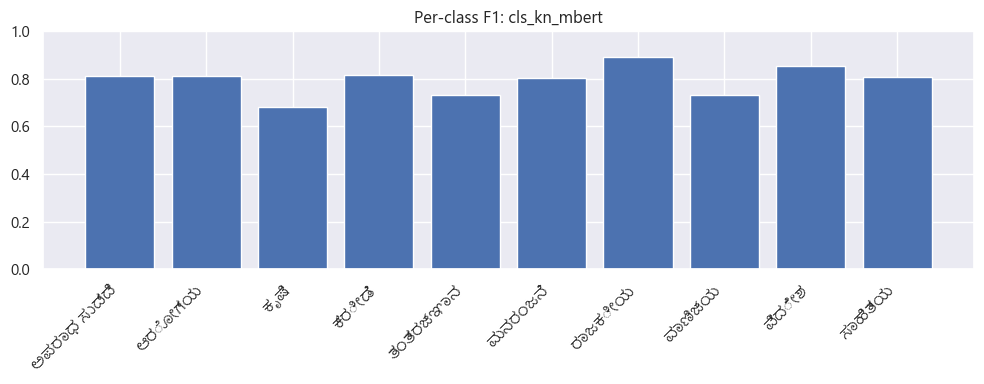

Saved: cls_kn_mbert_cm.png, cls_kn_mbert_per_class_f1.png, cls_kn_mbert_report.txt


Map:   0%|          | 0/12020 [00:00<?, ? examples/s]

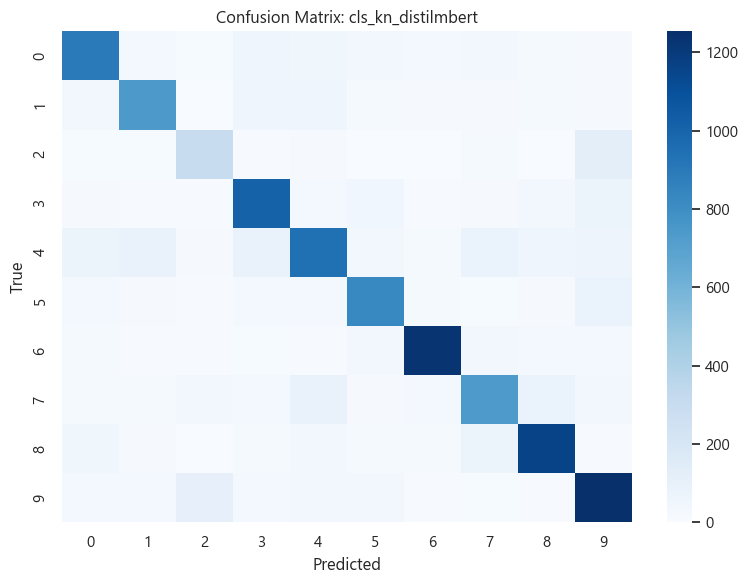

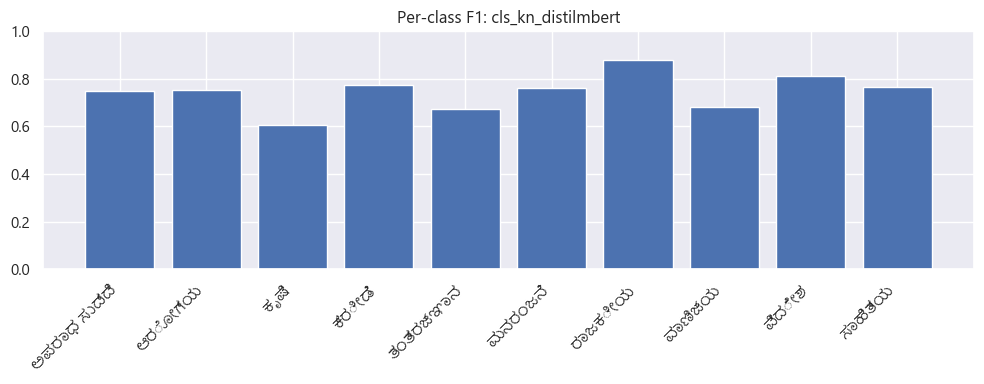

Saved: cls_kn_distilmbert_cm.png, cls_kn_distilmbert_per_class_f1.png, cls_kn_distilmbert_report.txt


In [ ]:
# Evaluation plots for supervised models: confusion matrix and per-class F1; save artifacts
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support

# Use already-defined encodings and label names
label_names = list(le.classes_)

def save_cm_and_f1(y_true, y_pred, out_prefix: str):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {out_prefix}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.savefig(f'{out_prefix}_cm.png', dpi=150)
    plt.show()

    # Per-class F1
    p, r, f1, support = precision_recall_fscore_support(y_true, y_pred, average=None, zero_division=0)
    fig, ax = plt.subplots(figsize=(10,4))
    ax.bar(range(len(label_names)), f1)
    ax.set_xticks(range(len(label_names)))
    ax.set_xticklabels(label_names, rotation=45, ha='right')
    ax.set_ylim(0,1)
    ax.set_title(f'Per-class F1: {out_prefix}')
    fig.tight_layout()
    fig.savefig(f'{out_prefix}_per_class_f1.png', dpi=150)
    plt.show()

    # Save report
    report = classification_report(y_true, y_pred, target_names=label_names, digits=4)
    with open(f'{out_prefix}_report.txt', 'w', encoding='utf-8') as f:
        f.write(report)
    print(f'Saved: {out_prefix}_cm.png, {out_prefix}_per_class_f1.png, {out_prefix}_report.txt')

# Evaluate current Trainer model (xlm-roberta) already in memory, if present
try:
    preds = trainer.predict(test_ds)
    y_pred = np.argmax(preds.predictions, axis=-1)
    save_cm_and_f1(y_te_enc, y_pred, 'cls_kn_xlmr')
except Exception as e:
    print('Skipping inline trainer evaluation plots:', e)

# Evaluate saved models from the multi-model run, if available
try:
    import torch
    from transformers import AutoTokenizer, AutoModelForSequenceClassification
    from datasets import Dataset

    for ckpt, out_dir in [('xlm-roberta-base','cls_kn_xlmr_v2'),
                          ('bert-base-multilingual-cased','cls_kn_mbert'),
                          ('distilbert-base-multilingual-cased','cls_kn_distilmbert')]:
        model_path = os.path.join(out_dir, 'best_model')
        if not os.path.isdir(model_path):
            print(f'Model not found at {model_path}, skipping.')
            continue
        tok = AutoTokenizer.from_pretrained(model_path)
        mdl = AutoModelForSequenceClassification.from_pretrained(model_path)
        max_len = 128
        def tok_fn(batch):
            return tok(batch['text'], truncation=True, padding='max_length', max_length=max_len)
        ds = Dataset.from_dict({'text': X_te.tolist(), 'label': y_te_enc})
        ds = ds.map(tok_fn, batched=True)
        ds.set_format(type='torch', columns=['input_ids','attention_mask','label'])
        # Simple batched prediction
        mdl.eval()
        device = 'cuda' if torch.cuda.is_available() else 'cpu'
        mdl.to(device)
        import torch.utils.data as tud
        loader = tud.DataLoader(ds, batch_size=64)
        preds_list = []
        with torch.no_grad():
            for batch in loader:
                input_ids = batch['input_ids'].to(device)
                attention_mask = batch['attention_mask'].to(device)
                logits = mdl(input_ids=input_ids, attention_mask=attention_mask).logits
                preds_list.append(logits.cpu().numpy())
        y_pred = np.argmax(np.concatenate(preds_list, axis=0), axis=-1)
        save_cm_and_f1(y_te_enc, y_pred, out_dir)
except Exception as e:
    print('Could not evaluate saved models for plots:', e)